# Exploratory Data Analysis

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [2]:
df = pd.read_csv('./data/cleaned_results_and_rankings.csv')
df.head()

,date,home_team,away_team,home_score,away_score,neutral,home_rank,away_rank,h_goals_for_avg,h_goals_against_avg,a_goals_for_avg,a_goals_against_avg,datetime,match_type_FIFA_WCQ,match_type_Friendly,match_type_Qualifier,match_type_Tournament/Cup_Match
0,1993-01-01,Ghana,Mali,1,1,1,39.0,69.0,0.0,0.0,0.0,0.0,1993-01-01,0,1,0,0
1,1993-01-02,Gabon,Burkina Faso,1,1,0,55.0,97.0,0.0,0.0,0.0,0.0,1993-01-02,0,1,0,0
2,1993-01-02,Kuwait,Lebanon,2,0,0,71.0,161.0,0.0,0.0,0.0,0.0,1993-01-02,0,1,0,0
3,1993-01-03,Burkina Faso,Mali,1,0,1,97.0,69.0,0.0,0.0,1.0,1.0,1993-01-03,0,1,0,0
4,1993-01-03,Gabon,Ghana,2,3,0,55.0,39.0,1.0,1.0,0.0,0.0,1993-01-03,0,1,0,0


In [3]:
df.shape

(23212, 17)

In [4]:
df.describe()

,home_score,away_score,neutral,home_rank,away_rank,h_goals_for_avg,h_goals_against_avg,a_goals_for_avg,a_goals_against_avg,match_type_FIFA_WCQ,match_type_Friendly,match_type_Qualifier,match_type_Tournament/Cup_Match
count,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000
mean,1.590557,1.065268,0.248191,77.133078,79.831337,1.578867,1.058258,1.050525,1.587493,0.224453,0.365199,0.174565,0.217172
std,1.536968,1.233606,0.431972,51.924689,52.725820,0.665309,0.603451,0.517663,0.833365,0.417230,0.481496,0.379603,0.412330
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,33.000000,36.000000,1.200000,0.700000,0.700000,1.100000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,70.000000,72.000000,1.500000,1.000000,1.000000,1.400000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,115.000000,118.000000,2.000000,1.300000,1.400000,1.900000,0.000000,1.000000,0.000000,0.000000
max,10.000000,10.000000,1.000000,211.000000,211.000000,9.000000,7.000000,7.000000,22.000000,1.000000,1.000000,1.000000,1.000000


---

## EDA on Goals

In [45]:
df['home_score'].value_counts(normalize=True).sort_index()

0     0.261287
1     0.302990
2     0.220705
3     0.110546
4     0.055316
5     0.024255
6     0.012494
7     0.006031
8     0.003619
9     0.001723
10    0.001034
Name: home_score, dtype: float64

In [46]:
df['away_score'].value_counts(normalize=True).sort_index()

0     0.398759
1     0.324401
2     0.168404
3     0.065354
4     0.024729
5     0.009004
6     0.004524
7     0.002843
8     0.001206
9     0.000388
10    0.000388
Name: away_score, dtype: float64

In [47]:
home_averages = df.groupby('home_team').mean()
CONCACAF_homegames = home_averages.loc[['Canada', 'Costa Rica', 'El Salvador', 'Honduras', 'Jamaica', 'Panama', 'Mexico', 'United States']]
CONCACAF_homegames[['home_score', 'away_score', 'neutral', 'home_rank', 'away_rank']]

,home_score,away_score,neutral,home_rank,away_rank
home_team,,,,,
Canada,1.400000,0.847619,0.323810,77.485714,67.609524
Costa Rica,1.788889,0.866667,0.372222,45.505556,66.777778
El Salvador,1.265060,1.168675,0.554217,90.873494,81.343373
Honduras,1.677596,1.005464,0.437158,53.743169,70.754098
Jamaica,1.583815,0.849711,0.300578,59.028902,76.526012
Panama,1.526316,0.834586,0.195489,82.548872,77.375940
Mexico,1.878205,0.855769,0.657051,15.121795,47.647436
United States,1.737463,1.082596,0.073746,21.011799,52.345133


In [9]:
home_goals_for = CONCACAF_homegames['home_score'].sort_values(ascending=False)
home_goals_for

home_team
Mexico           1.878205
Costa Rica       1.788889
United States    1.737463
Honduras         1.677596
Jamaica          1.583815
Panama           1.526316
Canada           1.400000
El Salvador      1.265060
Name: home_score, dtype: float64

In [10]:
home_goals_against = CONCACAF_homegames['away_score'].sort_values(ascending=False)
home_goals_against

home_team
El Salvador      1.168675
United States    1.082596
Honduras         1.005464
Costa Rica       0.866667
Mexico           0.855769
Jamaica          0.849711
Canada           0.847619
Panama           0.834586
Name: away_score, dtype: float64

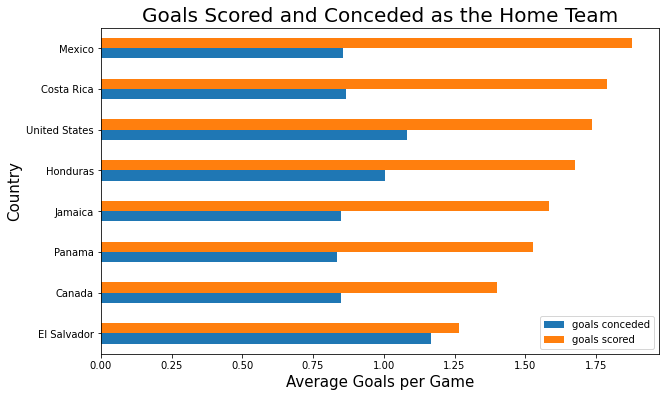

In [30]:
ax = CONCACAF_homegames.sort_values('home_score', ascending=True).plot(y=[ 'away_score', 'home_score'], 
                                                                  kind='barh', figsize=(10,6))
plt.title('Goals Scored and Conceded as the Home Team', size=20)
plt.xlabel('Average Goals per Game', size=15)
plt.ylabel('Country', size=15)
ax.legend(labels=('goals conceded', 'goals scored'))
plt.savefig('./images/goals_scored_conceded_as_hometeam.png', bbox_inches='tight')
plt.show();

In [48]:
away_averages = df.groupby('away_team').mean()
CONCACAF_awaygames = away_averages.loc[['Canada', 'Costa Rica', 'El Salvador', 'Honduras', 'Jamaica', 'Panama', 'Mexico', 'United States']]
CONCACAF_awaygames[['home_score', 'away_score', 'neutral', 'home_rank', 'away_rank']]

,home_score,away_score,neutral,home_rank,away_rank
away_team,,,,,
Canada,1.596774,1.120968,0.314516,63.411290,78.814516
Costa Rica,1.479263,1.082949,0.276498,50.368664,43.230415
El Salvador,1.776978,0.827338,0.330935,69.309353,92.489209
Honduras,1.528409,1.267045,0.352273,60.221591,54.539773
Jamaica,1.476684,1.046632,0.274611,70.875648,54.658031
Panama,1.699422,0.838150,0.271676,58.150289,82.722543
Mexico,1.245098,1.450980,0.436275,40.602941,15.093137
United States,1.670455,1.028409,0.176136,62.215909,20.426136


In [13]:
away_goals_for = CONCACAF_awaygames['away_score'].sort_values(ascending=False)
away_goals_for

away_team
Mexico           1.450980
Honduras         1.267045
Canada           1.120968
Costa Rica       1.082949
Jamaica          1.046632
United States    1.028409
Panama           0.838150
El Salvador      0.827338
Name: away_score, dtype: float64

In [14]:
away_goals_against = CONCACAF_awaygames['home_score'].sort_values(ascending=False)
away_goals_against

away_team
El Salvador      1.776978
Panama           1.699422
United States    1.670455
Canada           1.596774
Honduras         1.528409
Costa Rica       1.479263
Jamaica          1.476684
Mexico           1.245098
Name: home_score, dtype: float64

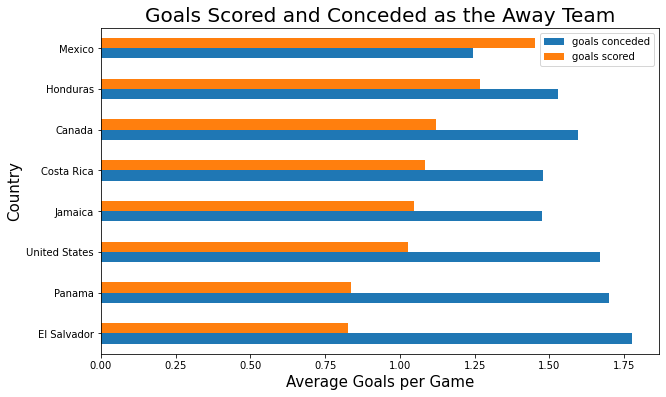

In [31]:
ax = CONCACAF_awaygames.sort_values('away_score', ascending=True).plot(y=[ 'home_score', 'away_score'], 
                                                                  kind='barh', figsize=(10,6))
plt.title('Goals Scored and Conceded as the Away Team', size=20)
plt.xlabel('Average Goals per Game', size=15)
plt.ylabel('Country', size=15)
ax.legend(labels=('goals conceded', 'goals scored'))
plt.savefig('./images/goals_scored_conceded_as_awayteam.png', bbox_inches='tight')
plt.show();

---

## EDA on Win/Loss based on Home vs. Away

In [33]:
# percentage of wins by home teams
df[df['home_score'] > df['away_score']].index.nunique() / df.shape[0]

0.48358607616749955

In [34]:
# percentage of wins by away teams
df[df['home_score'] < df['away_score']].index.nunique() / df.shape[0]

0.27602102360847836

In [35]:
# percentage of ties
df[df['home_score'] == df['away_score']].index.nunique() / df.shape[0]

0.24039290022402207

In [43]:
homeaway_winloss = {'outcome': ['home_win', 'away_win', 'draw'], 'average_occurrence': ['48%', '28%', '24%']}
dfi.export(pd.DataFrame(homeaway_winloss), './images/home_v_away_winloss.png')
pd.DataFrame(homeaway_winloss)

,outcome,average_occurrence
0,home_win,48%
1,away_win,28%
2,draw,24%


---

## EDA on Win/Loss based on Rank

In [16]:
# win percentage of higher ranked teams
high_rank_win_pct = (df[(df['home_rank'] < df['away_rank']) & (df['home_score'] > df['away_score'])].index.nunique() + df[(df['away_rank'] < df['home_rank']) & (df['away_score'] > df['home_score'])].index.nunique()) / df.shape[0]
high_rank_win_pct

0.5454506289850077

In [15]:
# win percentage of lower ranked teams
low_rank_win_pct = (df[(df['home_rank'] > df['away_rank']) & (df['home_score'] > df['away_score'])].index.nunique() + df[(df['away_rank'] > df['home_rank']) & (df['away_score'] > df['home_score'])].index.nunique()) / df.shape[0]
low_rank_win_pct

0.2141564707909702

In [17]:
# percentage of draws
tie_pct = (df[(df['home_rank'] < df['away_rank']) & (df['home_score'] == df['away_score'])].index.nunique() + df[(df['away_rank'] < df['home_rank']) & (df['away_score'] == df['home_score'])].index.nunique()) / df.shape[0]
tie_pct

0.24039290022402207

In [44]:
ranks_winloss = {'outcome': ['higher_rank_wins', 'lower_rank_wins', 'draw'], 'average_occurrence': ['55%', '21%', '24%']}
dfi.export(pd.DataFrame(ranks_winloss), './images/ranks_winloss.png')
pd.DataFrame(ranks_winloss)

,outcome,average_occurrence
0,higher_rank_wins,55%
1,lower_rank_wins,21%
2,draw,24%


---

## Correlation Checks

<AxesSubplot:>

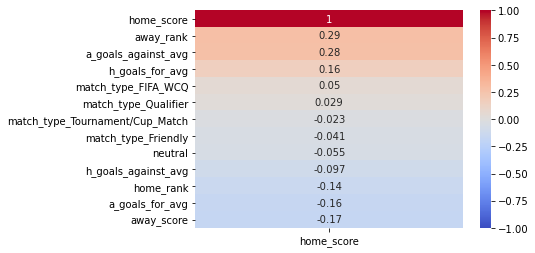

In [18]:
sns.heatmap(df.corr()[['home_score']].sort_values('home_score', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<AxesSubplot:>

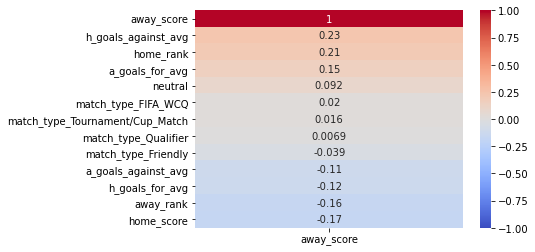

In [19]:
sns.heatmap(df.corr()[['away_score']].sort_values('away_score', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)